In [71]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

from utils.preprocessing import  label_encode
from utils.activition_functions import  signum
from utils.visualization import visualize_features, plot_decesion_boundary

In [72]:
df = pd.read_csv('penguins.csv')
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450
...,...,...,...,...,...,...
145,Chinstrap,50.8,18.5,201,male,4450
146,Chinstrap,50.1,17.9,190,female,3400
147,Chinstrap,49.0,19.6,212,male,4300
148,Chinstrap,51.5,18.7,187,male,3250


In [73]:
class1 = 'Gentoo'
class2 = 'Adelie'
feature1 = 'bill_depth_mm'
feature2 = 'body_mass_g'

In [74]:
df = df[(df['species'] == class1) | (df['species'] == class2)].copy()

In [75]:
df['gender'] = label_encode(df['gender'])
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,1,3750
1,Adelie,39.5,17.4,186,0,3800
2,Adelie,40.3,18.0,195,0,3250
3,Adelie,39.6,17.7,186,0,3500
4,Adelie,36.7,19.3,193,0,3450
...,...,...,...,...,...,...
95,Gentoo,43.6,13.9,217,0,4900
96,Gentoo,45.5,13.9,210,0,4200
97,Gentoo,50.5,15.9,225,1,5400
98,Gentoo,44.9,13.3,213,0,5100


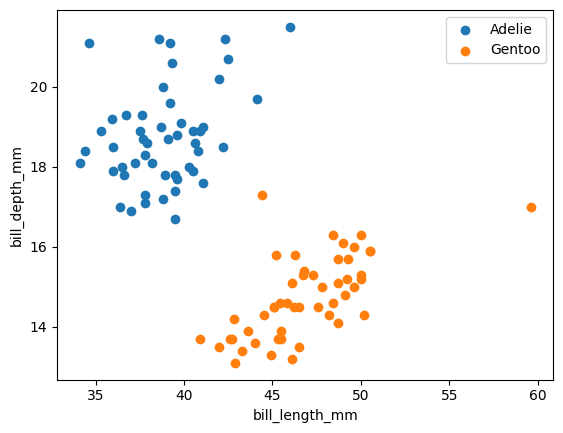

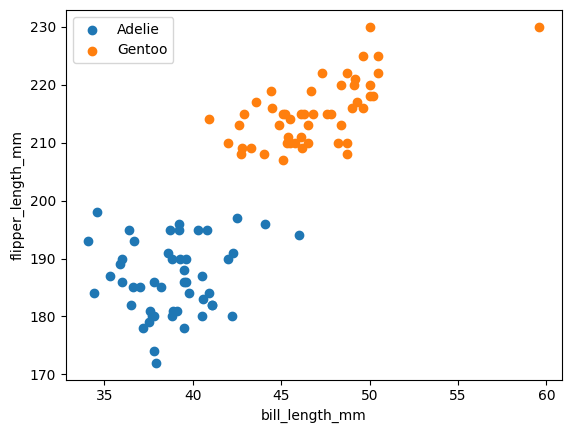

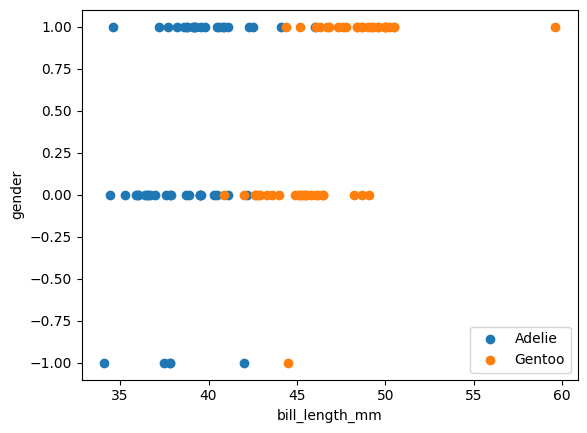

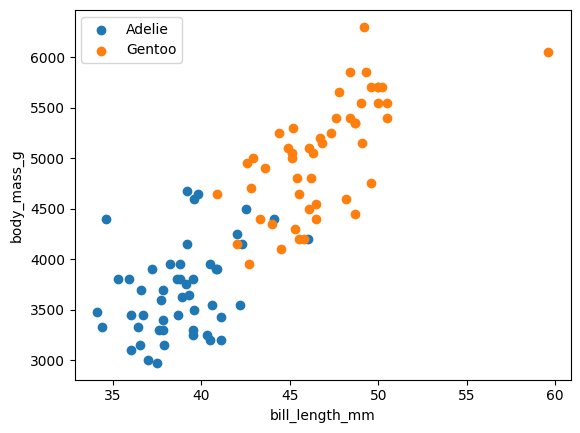

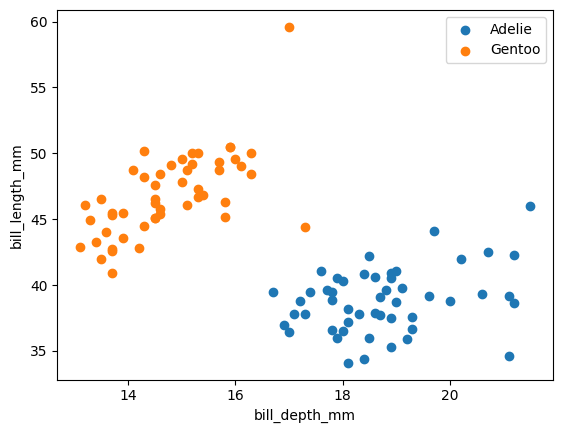

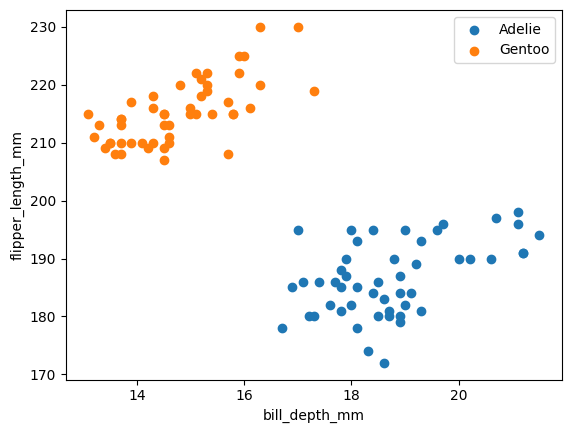

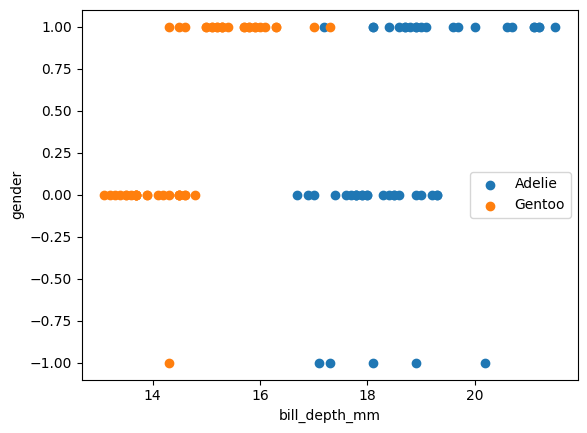

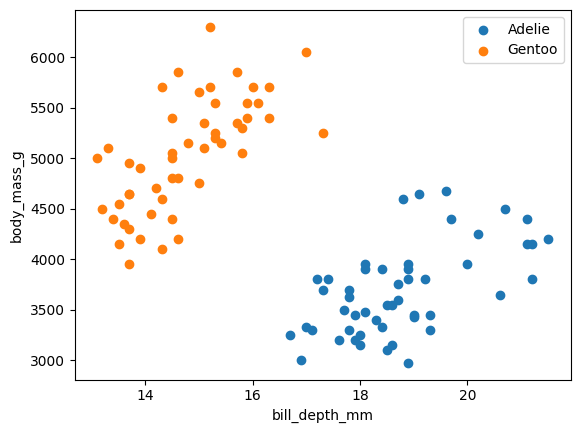

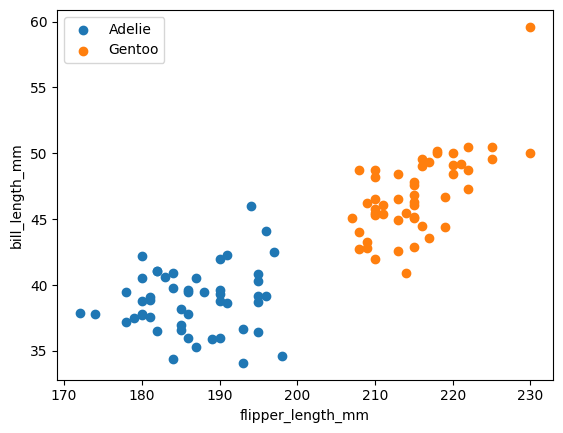

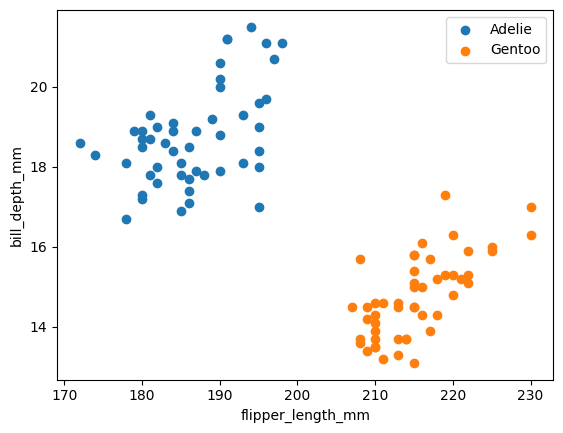

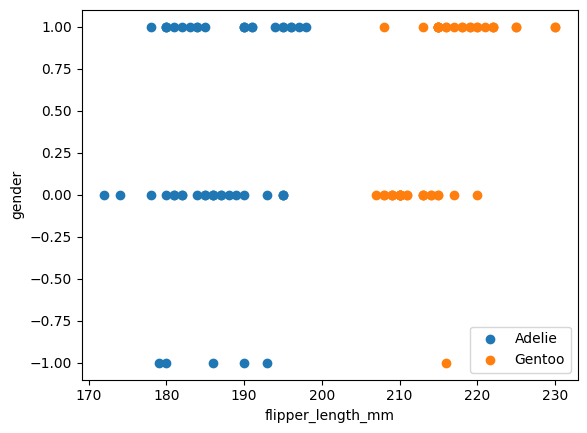

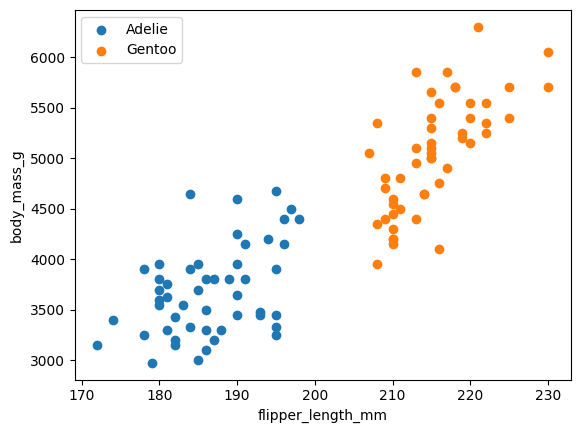

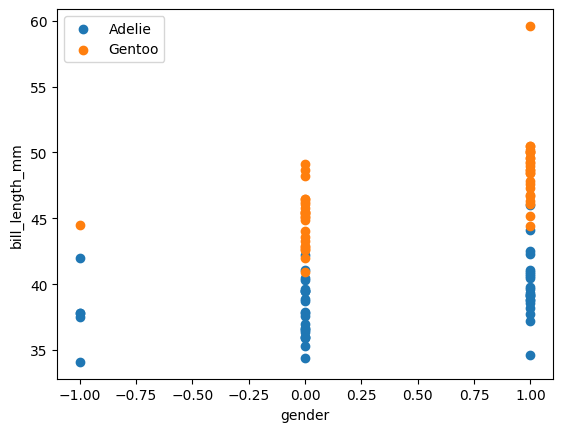

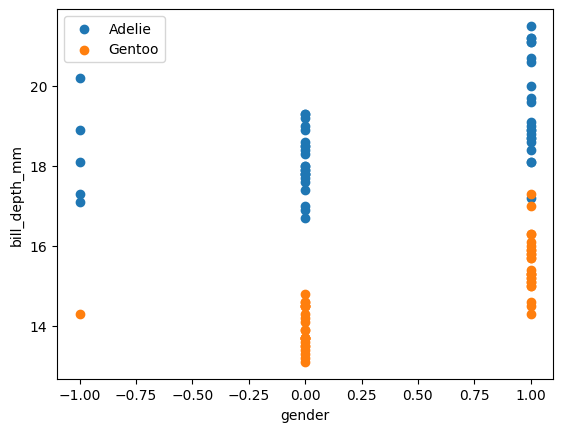

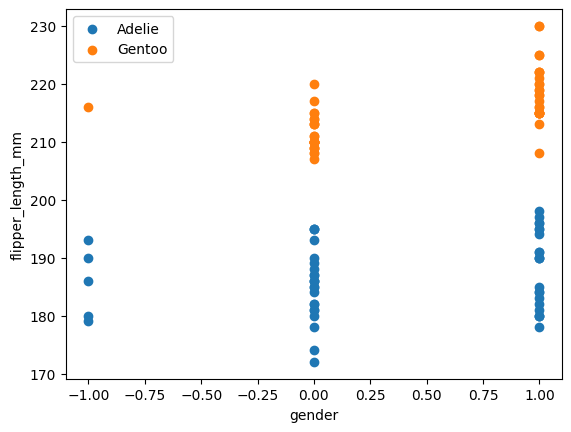

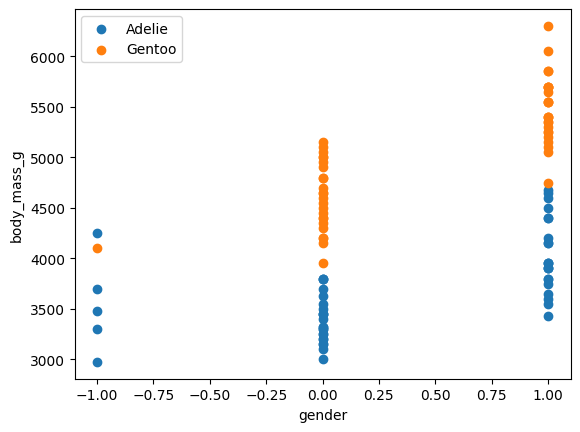

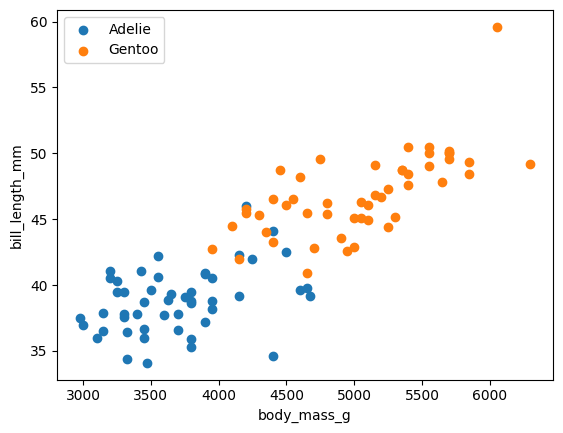

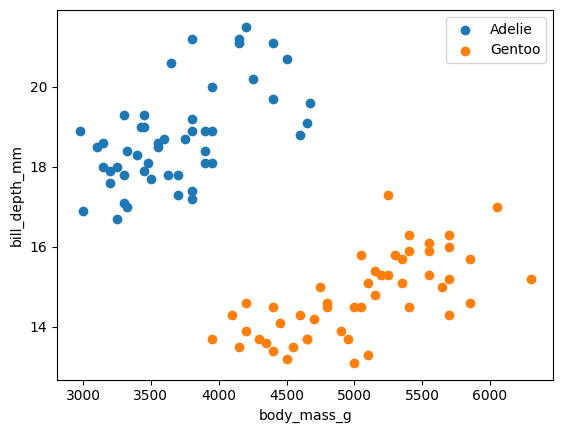

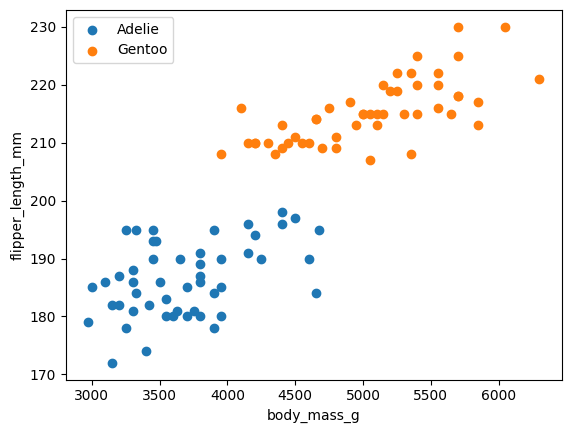

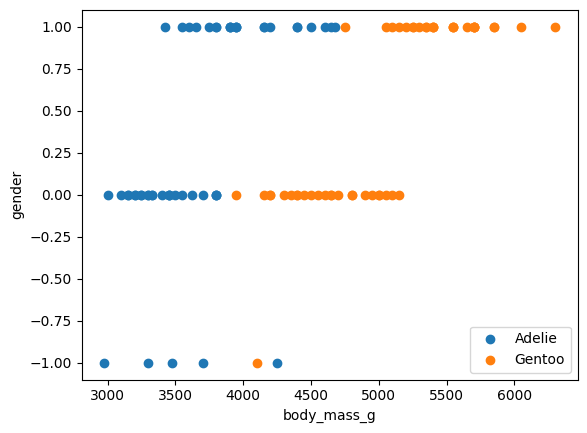

In [76]:
for f1 in df.columns[1:]:
    for f2 in df.columns[1:]:
        if f1 != f2:
            visualize_features(df, f1, f2, df.columns[0])

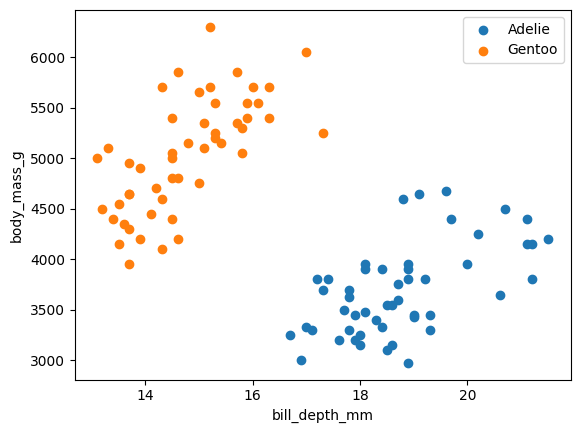

In [77]:
visualize_features(df, feature1, feature2, 'species')

In [78]:
df['bias'] = 1

In [79]:
C1 = df[df['species'] == class1].copy()
C1['species'] = 1
C1.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g,bias
50,1,46.1,13.2,211,0,4500,1
51,1,50.0,16.3,230,1,5700,1
52,1,48.7,14.1,210,0,4450,1
53,1,50.0,15.2,218,1,5700,1
54,1,47.6,14.5,215,1,5400,1


In [80]:
C2 = df[df['species'] == class2].copy()
C2['species'] = -1
C2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g,bias
0,-1,39.1,18.7,181,1,3750,1
1,-1,39.5,17.4,186,0,3800,1
2,-1,40.3,18.0,195,0,3250,1
3,-1,39.6,17.7,186,0,3500,1
4,-1,36.7,19.3,193,0,3450,1


In [81]:
C1_X = C1[[feature1, feature2, 'bias']]
C1_D = C1['species']

C2_X = C2[[feature1, feature2, 'bias']]
C2_D = C2['species']

In [82]:
C1_X_Train, C1_X_Test, C1_D_Train, C1_D_Test = train_test_split(C1_X, C1_D, test_size=0.4)
C2_X_Train, C2_X_Test, C2_D_Train, C2_D_Test = train_test_split(C2_X, C2_D, test_size=0.4)

In [83]:
print(f'C1_X_Train: {C1_X_Train.shape}')
print(f'C1_X_Test: {C1_X_Test.shape}')
print(f'C1_D_Train: {C1_D_Train.shape}')
print(f'C1_D_Test: {C1_D_Test.shape}')
print(f'C2_X_Train: {C2_X_Train.shape}')
print(f'C2_X_Test: {C2_X_Test.shape}')
print(f'C2_D_Train: {C2_D_Train.shape}')
print(f'C2_D_Test: {C2_D_Test.shape}')

C1_X_Train: (30, 3)
C1_X_Test: (20, 3)
C1_D_Train: (30,)
C1_D_Test: (20,)
C2_X_Train: (30, 3)
C2_X_Test: (20, 3)
C2_D_Train: (30,)
C2_D_Test: (20,)


In [84]:
X_Train = pd.concat([C1_X_Train, C2_X_Train]).to_numpy()
D_Train = pd.concat([C1_D_Train, C2_D_Train]).to_numpy()
X_Test = pd.concat([C1_X_Test, C2_X_Test]).to_numpy()
D_Test = pd.concat([C1_D_Test, C2_D_Test]).to_numpy()

In [85]:
W = np.array([-1, 0, 0.2])
W

array([-1. ,  0. ,  0.2])

In [86]:
nb_epochs = 1000
eta = 0.001

In [87]:
f'old weights: {W}'

'old weights: [-1.   0.   0.2]'

In [88]:
for i in range(nb_epochs):
    error_found = False
    for x, d in zip(X_Train, D_Train):
        net = (x * W).sum()
        y = signum(net)
        if y != d:
            error_found = True
            error = d - y
            W = W + (eta * x * error)

    if not error_found:
        break

In [89]:
f'new weights: {W}'

'new weights: [-22.2478  -5.6     -0.574 ]'

In [90]:
signum_vectorizer = np.vectorize(signum)
nb_correct = 0
for x, d in zip(X_Test, D_Test):
    net = np.dot(x, W)
    y = signum_vectorizer(net)
    if y == d:
        nb_correct +=1
accuracy = nb_correct / X_Test.shape[0]

In [91]:
(nb_correct, X_Test.shape[0])

(20, 40)

In [92]:
f'accuray: {accuracy}'

'accuray: 0.5'

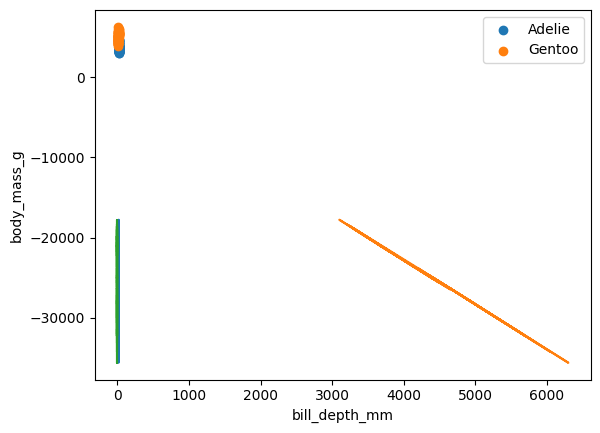

In [93]:
Y_Train = np.zeros(shape=D_Train.shape)
for i, x in enumerate(X_Train):
    y = (x * W).sum()
    Y_Train[i] = y

df = df[(df['species'] == class1) | (df['species'] == class2)]
plot_decesion_boundary(df, feature1, feature2, 'species', X_Train, Y_Train)

In [94]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g,bias
0,Adelie,39.1,18.7,181,1,3750,1
1,Adelie,39.5,17.4,186,0,3800,1
2,Adelie,40.3,18.0,195,0,3250,1
3,Adelie,39.6,17.7,186,0,3500,1
4,Adelie,36.7,19.3,193,0,3450,1
...,...,...,...,...,...,...,...
95,Gentoo,43.6,13.9,217,0,4900,1
96,Gentoo,45.5,13.9,210,0,4200,1
97,Gentoo,50.5,15.9,225,1,5400,1
98,Gentoo,44.9,13.3,213,0,5100,1


In [95]:
conf_y_train = np.zeros(shape=D_Train.shape)

for i in D_Train:
    conf_y_train[i] = signum(D_Train[i])

conf_y_train

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -1.])

In [96]:
conf_y_pred = np.zeros(shape=Y_Train.shape)

for i in range(40):
    conf_y_pred[i]=signum(Y_Train[i])

conf_y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

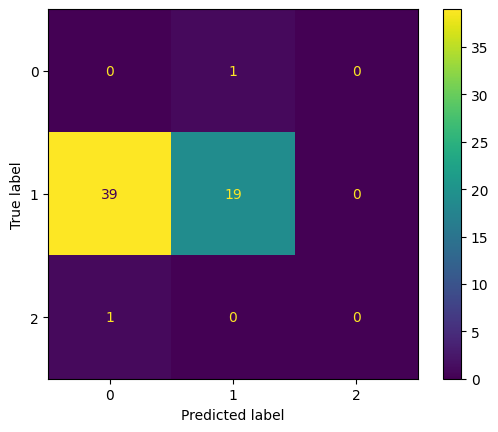

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

cm=confusion_matrix(conf_y_train, conf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)
disp.plot()
plt.show()


In [101]:
cm

array([[ 0,  1,  0],
       [39, 19,  0],
       [ 1,  0,  0]], dtype=int64)

In [106]:
Numb_of_classes = np.unique(conf_y_train)

conf_matrix = np.zeros((len(Numb_of_classes), len(Numb_of_classes)))

for i in range(len(Numb_of_classes)):
        for j in range(len(Numb_of_classes)):
           conf_matrix[i, j] = np.sum((conf_y_train == Numb_of_classes[i]) & (conf_y_pred == Numb_of_classes[j]))
conf_matrix


array([[ 0.,  1.,  0.],
       [39., 19.,  0.],
       [ 1.,  0.,  0.]])